In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-14 19:27:36.565856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 19:27:36.586122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 19:27:36.592342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 19:27:36.607240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 19:27:38.432998: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
2280,RF-SPUD,winequality-red,skewed,0.3,"{'knn': 290, 'OD_method': 'default', 'agg_meth...",{'42': 0.04127579737335835},{'42': 0.0},{'42': 0.030101641907740423},{'42': 0.0234375},{'42': 0.03125},{'42': 0.021503347020650397},{'42': 0.02237284975583406},"{'42': {'RF-OOB': 0.05629397967161845, 'KNN': ...",{}
1372,MASH,breast_cancer,turn,0.3,"{'knn': 86, 'page_rank': 'None', 'DTM': 'log',...","{'42': 0.9785407725321889, '1738': 0.975679542...","{'42': 0.0033309387414270537, '1738': 0.003335...","{'42': 0.9722719141323792, '1738': 0.971377459...","{'42': 0.9678571428571429, '1738': 0.978571428...","{'42': 0.9642857142857143, '1738': 0.978571428...","{'42': 0.9641785651256797, '1738': 0.978614918...","{'42': 0.9678095405672057, '1738': 0.978614918...","{'42': {'RF-OOB': 0.9722719141323792, 'KNN': 0...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."
1499,MASH-,balance_scale,distort,0.3,"{'knn': 119, 'page_rank': 'off-diagonal', 'DTM...","{'42': 0.8688, '1738': 0.8544, '5271': 0.8832,...","{'42': 0.00031232000000000005, '1738': 0.00028...","{'42': 0.939, '1738': 0.935, '5271': 0.919, '9...","{'42': 0.82, '1738': 0.848, '5271': 0.88, '920...","{'42': 0.868, '1738': 0.876, '5271': 0.88, '92...","{'42': 0.8279669328849657, '1738': 0.850767409...","{'42': 0.801537185837461, '1738': 0.8566463014...","{'42': {'RF-OOB': 0.937, 'KNN': 0.872, 'RF': 0...","{'knn': 0.01805802932862652, 'page_rank': 0.00..."
2104,SPUD,hepatitis,turn,0.3,"{'knn': 17, 'OD_method': 'default', 'agg_metho...","{'42': 0.6666666666666666, '1738': 0.666666666...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.6409090909090909, '1738': 0.595454545...","{'42': 0.625, '1738': 0.7678571428571429, '527...","{'42': 0.75, '1738': 0.8035714285714286, '5271...","{'42': 0.7552083333333334, '1738': 0.800678045...","{'42': 0.6316297010607521, '1738': 0.761928452...","{'42': {'RF-OOB': 0.6590909090909091, 'KNN': 0...","{'knn': 0.05246283354228927, 'OD_method': 0.02..."
2671,RF-MASH,parkinsons,turn,0.3,"{'knn': 6, 'page_rank': 'full', 'DTM': 'log', ...","{'42': 0.9333333333333333, '1738': 0.938461538...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.9230769230769231, '1738': 0.929487179...","{'42': 0.8974358974358975, '1738': 0.974358974...","{'42': 0.8846153846153846, '1738': 0.974358974...","{'42': 0.8888138957816377, '1738': 0.973814998...","{'42': 0.9000407000407, '1738': 0.973814998887...","{'42': {'RF-OOB': 0.9294871794871795, 'KNN': 0...","{'connection_limit': 0.0, 'threshold': 1.13875..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


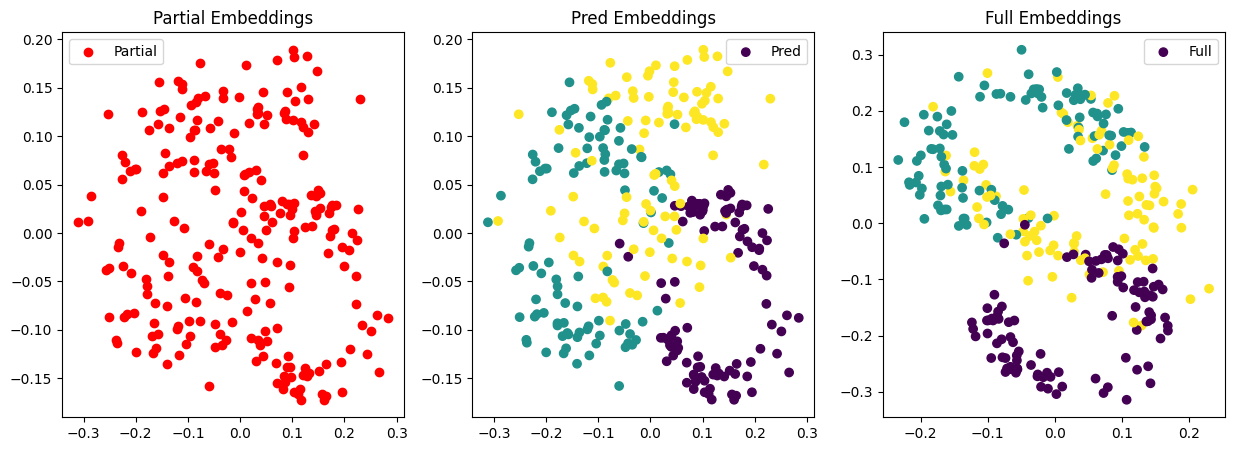

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

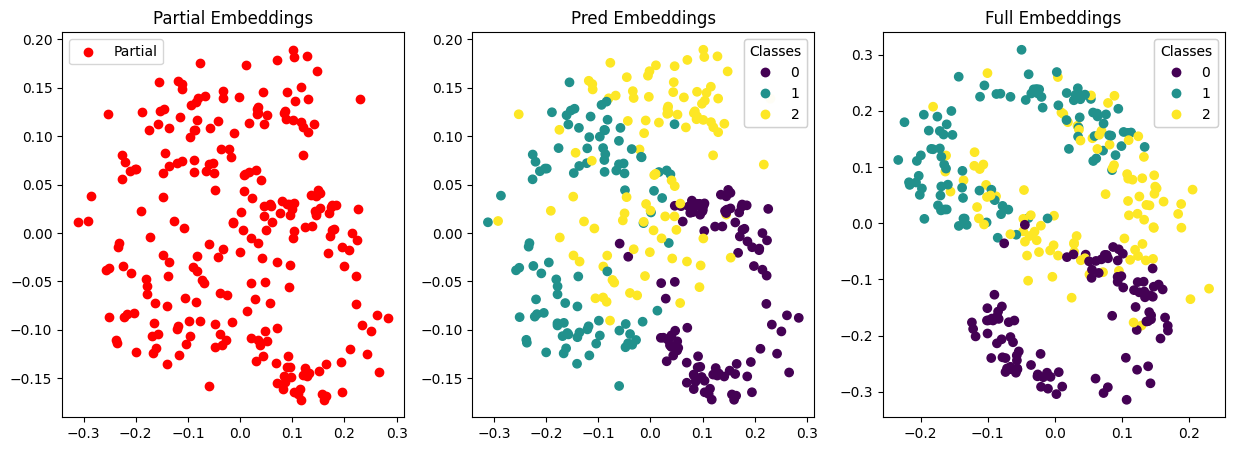

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


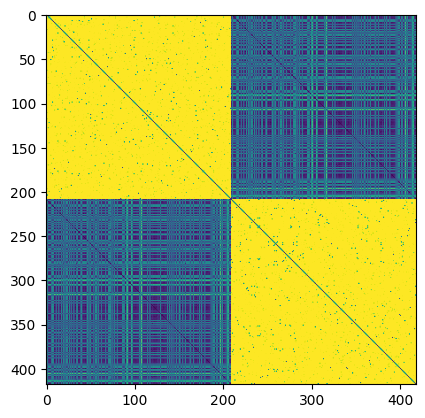

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

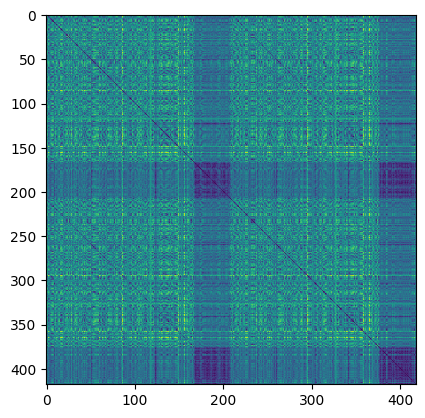

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

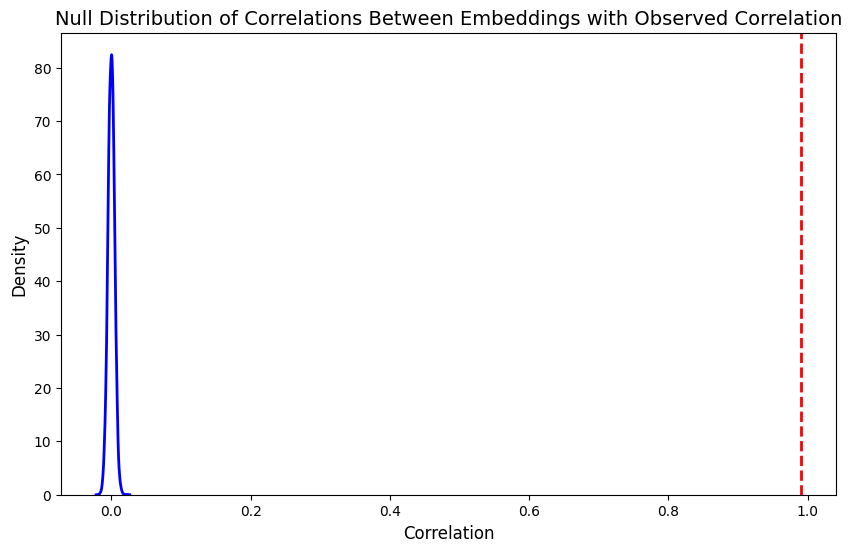

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/SPUD_iris_turn.json
SPUD iris turn {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'}
0.9900880836094449 0.0


In [10]:
r_obs, p_value = mantel_test(*iris_task, plot = True, repeat_results = True)
print(*iris_task)
print(r_obs, p_value)

In [11]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+14]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

('RF-NAMA', 'ComputerHardware', 'skewed', {'OD_method': 'mean', 'agg_method': 'log'})
Results already exist for RF-NAMA, ComputerHardware, skewed.
Plotting is disabled for existing files.
nan nan
('MASH-', 'ComputerHardware', 'distort', {'knn': 7, 'page_rank': 'None', 'DTM': 'log', 'density_normalization': True})
Results already exist for MASH-, ComputerHardware, distort.
Plotting is disabled for existing files.
nan nan
('RF-SPUD', 'ComputerHardware', 'random', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})
Results already exist for RF-SPUD, ComputerHardware, random.
Plotting is disabled for existing files.
nan nan
('SPUD', 'ComputerHardware', 'skewed', {'knn': 17, 'OD_method': 'default', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, skewed.
Plotting is disabled for existing files.
nan nan
('SPUD', 'ComputerHardware', 'distort', {'knn': 22, 'OD_method': 'mean', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, distort.
Plotting

In [12]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[103:108]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-14 19:29:04.678902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 19:29:04.697041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 19:29:04.702605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 19:29:04.715957: I tensorflow/core/platf

Results already exist for RF-MASH-, Hydrodynamics, turn.


Results already exist for RF-SPUD, Hydrodynamics, distort.
Results already exist for MASH-, Hydrodynamics, even.


100%|██████████| 5/5 [00:12<00:00,  2.56s/it]

Results already exist for NAMA, Hydrodynamics, distort.
Results already exist for RF-SPUD, Hydrodynamics, skewed.


# Vizualizations

In [29]:
from Helpers.Mantels_Helpers import read_all_mantel_results, plot_averaged_mantel_stats
from Helpers.Visualization_helpers import subset_df

In [30]:
mantel_df = read_all_mantel_results().dropna()
mantel_df

,method,dataset,split,r_obs,p_value,five_point_summary
0,RF-SPUD,iris,distort,0.424637,0.0,"{'min': -0.01887849485304357, 'Q1': -0.0032334..."
1,MASH-,Hydrodynamics,distort,0.876145,0.0,"{'min': -0.008608033719494666, 'Q1': -0.001551..."
2,RF-SPUD,Hydrodynamics,distort,0.112999,0.0,"{'min': -0.00827523911200166, 'Q1': -0.0015750..."
3,SPUD,ComputerHardware,random,0.886269,0.0,"{'min': -0.01262857674470666, 'Q1': -0.0023140..."
4,NAMA,hepatitis,skewed,0.698573,0.0,"{'min': -0.01901321108458445, 'Q1': -0.0034769..."
...,...,...,...,...,...,...
238,RF-NAMA,parkinsons,even,0.438659,0.0,"{'min': -0.013987960299253022, 'Q1': -0.002387..."
239,RF-MASH,ecoli_5,skewed,0.667486,0.0,"{'min': -0.007869330920453901, 'Q1': -0.001475..."
240,RF-SPUD,segmentation,distort,0.393766,0.0,"{'min': -0.012913254321180748, 'Q1': -0.002258..."
241,MASH,ComputerHardware,skewed,0.928937,0.0,"{'min': -0.013216146280176056, 'Q1': -0.002249..."


In [31]:
subset_df(mantel_df, p_value = 1.0)

,method,dataset,split,r_obs,p_value,five_point_summary
133,RF-NAMA,Hydrodynamics,distort,-0.014502,1.0,"{'min': -0.008369886271556833, 'Q1': -0.001576..."


In [32]:
len(subset_df(mantel_df, p_value = 0.0))

235

Mean P-Value: 0.00423728813559322
Minimun P-value: 0.0
Maximum P-value: 1.0


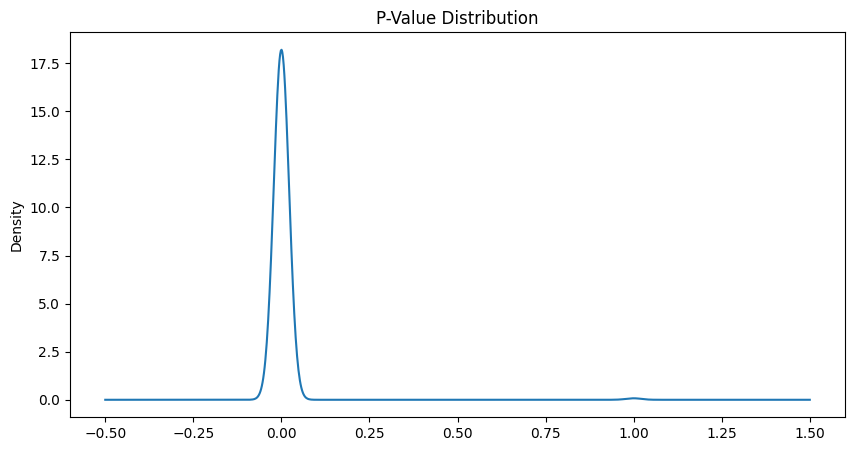

In [33]:
print(f"Mean P-Value: {mantel_df['p_value'].mean()}")
print(f"Minimun P-value: {mantel_df['p_value'].min()}")
print(f"Maximum P-value: {mantel_df['p_value'].max()}")

#The following will error if all the p_values are 0
if mantel_df["p_value"].max() == 0:
    print("All P-Values are 0 -- cannot plot")
else:
    mantel_df["p_value"].plot(kind="kde", title="P-Value Distribution", figsize=(10, 5))

Mean r_obs: 0.6151254391224088
Minimun r_obs: -0.014502148086816923
Maximum r_obs: 0.9998305476843161


<Axes: title={'center': 'r_obs Distribution'}, ylabel='Density'>

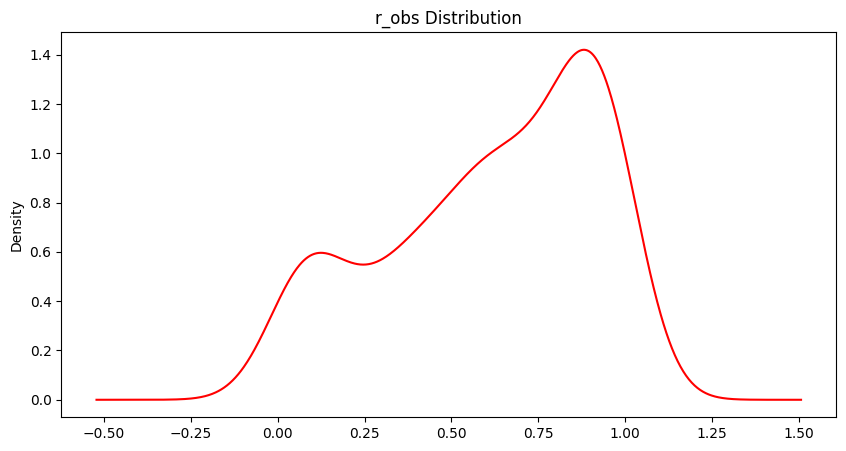

In [34]:
print(f"Mean r_obs: {mantel_df['r_obs'].mean()}")
print(f"Minimun r_obs: {mantel_df['r_obs'].min()}")
print(f"Maximum r_obs: {mantel_df['r_obs'].max()}")
mantel_df["r_obs"].plot(kind="kde", title="r_obs Distribution", figsize=(10, 5), c = "red")

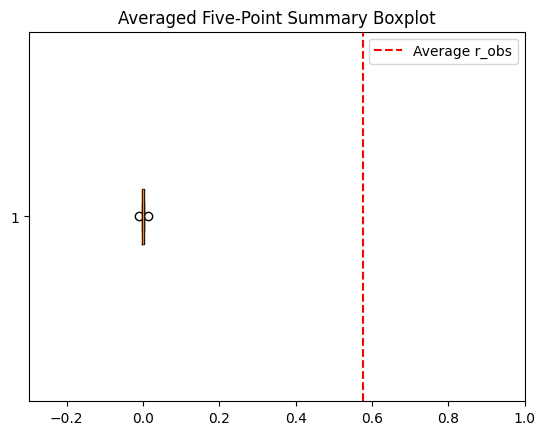

In [ ]:
plot_averaged_mantel_stats(mantel_df)